# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Import-and-load-data" data-toc-modified-id="Import-and-load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import and load data</a></div><div class="lev2 toc-item"><a href="#Imports" data-toc-modified-id="Imports-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></div><div class="lev2 toc-item"><a href="#Load" data-toc-modified-id="Load-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load</a></div><div class="lev1 toc-item"><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem Statement</a></div><div class="lev2 toc-item"><a href="#Examine-the-data" data-toc-modified-id="Examine-the-data-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Examine the data</a></div><div class="lev2 toc-item"><a href="#Write-functions" data-toc-modified-id="Write-functions-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Write functions</a></div><div class="lev3 toc-item"><a href="#Transverse-Momentum" data-toc-modified-id="Transverse-Momentum-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Transverse Momentum</a></div><div class="lev4 toc-item"><a href="#Add-to-DataFrame" data-toc-modified-id="Add-to-DataFrame-2211"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Add to DataFrame</a></div><div class="lev3 toc-item"><a href="#Rapidity" data-toc-modified-id="Rapidity-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Rapidity</a></div><div class="lev4 toc-item"><a href="#Add-to-DataFrame" data-toc-modified-id="Add-to-DataFrame-2221"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>Add to DataFrame</a></div><div class="lev3 toc-item"><a href="#Invariant-mass" data-toc-modified-id="Invariant-mass-223"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Invariant mass</a></div><div class="lev2 toc-item"><a href="#Plot-the-distributions" data-toc-modified-id="Plot-the-distributions-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot the distributions</a></div>

# Import and load data

## Imports

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


plt.rcParams.update({'font.family':'cmr10','font.size': 13})
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['axes.labelsize']=15
plt.rcParams['figure.figsize']=(4,4)

## Load

In [2]:
TotalSet = pd.read_csv('../Data/PracticeDataset.dat', index_col=0)

In [3]:
print ', '.join(TotalSet.columns)

e1, px1, py1, pz1, e2, px2, py2, pz2, type


How many different 'types' are there? Make a new DataFrame for each type

In [4]:
TotalSet['type']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
19970    1
19971    1
19972    1
19973    1
19974    1
19975    1
19976    1
19977    1
19978    1
19979    1
19980    1
19981    1
19982    1
19983    1
19984    1
19985    1
19986    1
19987    1
19988    1
19989    1
19990    1
19991    1
19992    1
19993    1
19994    1
19995    1
19996    1
19997    1
19998    1
19999    1
Name: type, Length: 40000, dtype: int64

In [23]:
DF1 = TotalSet[TotalSet['type']==0].copy()
DF2 = TotalSet[TotalSet['type']==1].copy()

# Problem Statement

These data files contain the four-vectors for $p\bar{p} \rightarrow b\bar{b}$ collisions. We want to see if we can make cuts which will distinguish the two data sets. To do this, we are going to need to define functions which will add transverse momentum, rapidity, and invariant mass to our data tables. We are also going to want to plot the data.

## Examine the data

In [24]:
DF1.describe()

,e1,px1,py1,pz1,e2,px2,py2,pz2,type
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0
mean,320.648543,-0.145971,-0.101480,-1.659961,320.471414,0.145971,0.101480,4.539662,0.0
std,484.657092,21.384376,21.400352,580.321447,482.569933,21.384376,21.400352,578.465905,0.0
min,4.909618,-58.167579,-58.702579,-4295.261719,5.052858,-58.953167,-58.333777,-4247.772589,0.0
25%,45.253404,-17.172721,-17.081240,-113.152260,45.889009,-16.796131,-16.699227,-112.305723,0.0
50%,116.585132,-0.216473,-0.206499,-0.134346,117.116937,0.216473,0.206499,-0.306893,0.0
75%,379.435399,16.796131,16.699227,111.391886,375.664524,17.172721,17.081240,112.908662,0.0
max,4295.354018,58.953167,58.333777,4204.867092,4247.796029,58.167579,58.702579,4013.222897,0.0


In [25]:
DF2.describe()

,e1,px1,py1,pz1,e2,px2,py2,pz2,type
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0
mean,383.831873,-0.206923,-0.035400,1.902207,228.134015,0.206923,0.035400,3.452655,1.0
std,532.591710,24.894383,24.755621,655.537854,347.885630,24.894383,24.755621,414.494289,0.0
min,4.866729,-55.904380,-56.460030,-4487.322713,5.123639,-58.142615,-56.217051,-4367.182120,1.0
25%,56.062120,-20.985931,-20.527712,-144.321602,46.457782,-20.338122,-20.555307,-88.673426,1.0
50%,149.870575,-0.342007,-0.235733,-0.955680,95.713317,0.342007,0.235733,0.650076,1.0
75%,492.355421,20.338122,20.555307,145.434683,250.499006,20.985931,20.527712,88.486945,1.0
max,4487.331244,58.142615,56.217051,4361.760256,4367.196821,55.904380,56.460030,3802.989172,1.0


## Write functions

### Transverse Momentum

In [26]:
# write a function that takes in an object (which is a pandas Data Frame with 4 columns) 
# and outputs the transverse momentum
def make_pt(four_vector):
    '''four_vector is a DataFrame with columns in the shape of ['e', 'px', 'py', 'pz']
    the output should be a column matrix.    
    '''
    fv = four_vector.as_matrix()
    e = fv[:, 0]
    px = fv[:, 1]
    py = fv[:, 2]
    pz = fv[:, 3]
    
    pt = np.sqrt(px**2 + py**2)
    
    return pt

#### Add to DataFrame

Add a $p_T$ column to each of the data frames for the $b$ and $\bar{b}$

In [27]:
for df in DF1, DF2:
    df['pt1'] = make_pt(df[['e1', 'px1', 'py1', 'pz1']])
    df['pt2'] = make_pt(df[['e2', 'px2', 'py2', 'pz2']])

Check to see if it worked

In [28]:
DF1.sample(10)

,e1,px1,py1,pz1,e2,px2,py2,pz2,type,pt1,pt2
11276,63.072782,36.016570,-13.539099,-49.755254,39.453919,-36.016570,13.539099,7.349910,0,38.477273,38.477273
7927,2973.718673,26.863585,18.897957,2973.533566,1489.524791,-26.863585,-18.897957,1489.155206,0,32.844863,32.844863
13899,104.411493,-12.450074,-19.291427,-101.747267,519.921789,12.450074,19.291427,-519.393312,0,22.960041,22.960041
14683,93.538133,-11.304512,-2.270924,-92.705680,13.725329,11.304512,2.270924,5.774563,0,11.530355,11.530355
2850,1518.317276,-13.490645,23.018340,-1518.075564,178.529938,13.490645,-23.018340,-176.462481,0,26.680358,26.680358
10410,30.498272,-0.936241,30.109490,0.772419,30.510803,0.936241,-30.109490,1.166696,0,30.124043,30.124043
10544,180.416907,16.355473,-9.630928,-179.354158,25.465678,-16.355473,9.630928,-16.314241,0,18.980418,18.980418
18233,200.434122,30.633095,-16.303299,-197.351370,116.196466,-30.633095,16.303299,-110.794154,0,34.701356,34.701356
18471,1394.889096,21.213039,24.687978,1394.501348,918.824824,-21.213039,-24.687978,918.236069,0,32.549797,32.549797
6554,75.523360,-14.704747,-20.211832,71.112166,344.144038,14.704747,20.211832,343.202974,0,24.994954,24.994954


### Rapidity

Now, let's do the same process, but for the rapidity of the particle. We will define rapidity as

\begin{equation}
y  = \frac{1}{2} \ln \left(\frac{E + p_z}{E - p_z} \right) \,.
\end{equation}
As we know, rapidity is useful because differences in rapidity, $\Delta y$ are invariant under longitudinal boosts.

In [29]:
# write a function that takes in an object (which is a pandas Data Frame with 4 columns) 
# and outputs the rapidity
def make_rapidity(four_vector):
    '''four_vector is a DataFrame with columns in the shape of ['e', 'px', 'py', 'pz']
    the output should be a column matrix.    
    '''
    fv = four_vector.as_matrix()
    e = fv[:, 0]
    px = fv[:, 1]
    py = fv[:, 2]
    pz = fv[:, 3]
    
    rap = 0.5 * np.log((e + pz) / (e - pz))
    
    return rap

In [30]:
np.log(np.e)

1.0

#### Add to DataFrame

In [31]:
for df in DF1, DF2:
    df['y1'] = make_rapidity(df[['e1', 'px1', 'py1', 'pz1']])
    df['y2'] = make_rapidity(df[['e2', 'px2', 'py2', 'pz2']])

Check that it worked

In [32]:
DF2.head(5)

,e1,px1,py1,pz1,e2,px2,py2,pz2,type,pt1,pt2,y1,y2
0,744.498417,-17.950328,-12.954194,-744.154404,55.940920,17.950328,12.954194,-51.159272,1,22.136518,22.136518,-4.186352,-1.554490
1,110.374840,12.695232,13.535216,108.702090,1975.334176,-12.695232,-13.535216,1975.241414,1,18.557236,18.557236,2.437477,5.329671
2,1286.156608,-4.587486,25.173872,1285.893449,128.198043,4.587486,-25.173872,125.530393,1,25.588452,25.588452,4.593727,2.277533
3,53.720220,-7.080857,13.251724,51.361710,37.782731,7.080857,-13.251724,-34.346732,1,15.024871,15.024871,1.898355,-1.522078
4,1054.601340,12.969103,20.525328,1054.311344,111.392335,-12.969103,-20.525328,108.612502,1,24.279347,24.279347,4.445908,2.185629


Did Madgraph impose any restrictions on the rapidity? Find the minimum and maximum rapidity in each sample for both the $b$ and $\bar{b}$.

In [33]:
DF2[['y1', 'y2']].describe()

,y1,y2
count,20000.000000,20000.000000
mean,-0.006796,0.010534
std,2.711301,2.202193
min,-6.982936,-6.647411
25%,-2.153611,-1.732666
50%,-0.030666,0.023227
75%,2.171802,1.742698
max,7.065231,6.684530


In [34]:
DF1[['y1', 'y2']].describe()

,y1,y2
count,20000.000000,20000.000000
mean,-0.008315,0.006878
std,2.642076,2.640931
min,-6.963738,-7.369071
25%,-2.123454,-2.113931
50%,-0.005164,-0.013727
75%,2.107943,2.122989
max,6.784410,7.024007


### Invariant mass
The invariant mass is defined as $p^2_4 = e^2 - p_3^2$. What we really want is the invariant mass of the s-channel propagator. Write two functions, one for the invariant mass of one particle, one for the invariant mass of the parent of two daughter particles.

In [35]:
# Invariant mass of one particle
def get_minv(four_vector):
    fv = four_vector.as_matrix()
    e = fv[:, 0]
    px = fv[:, 1]
    py = fv[:, 2]
    pz = fv[:, 3]
    
#     minv
    
    pass

In [36]:
# Invariant mass of two particles
def get_minv2(four_vector1, four_vector2):
    fv1 = four_vector1.as_matrix()
    e1 = fv1[:, 0]
    px1 = fv1[:, 1]
    py1 = fv1[:, 2]
    pz1 = fv1[:, 3]
    
    fv2 = four_vector2.as_matrix()
    e2 = fv2[:, 0]
    px2 = fv2[:, 1]
    py2 = fv2[:, 2]
    pz2 = fv2[:, 3]
    
    minv2 = (e1 + e2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2
    
    return np.sqrt(minv2)

In [37]:
for df in DF1, DF2:
    df['minv'] = get_minv2(df[['e1', 'px1', 'py1', 'pz1']],
                           df[['e2', 'px2', 'py2', 'pz2']]
                          )

## Plot the distributions

Get a list that has all of the columns in the data frame.

In [38]:
cols = DF1.columns
print ', '.join(cols)

e1, px1, py1, pz1, e2, px2, py2, pz2, type, pt1, pt2, y1, y2, minv


Use two for loops to plot histograms of all of the data

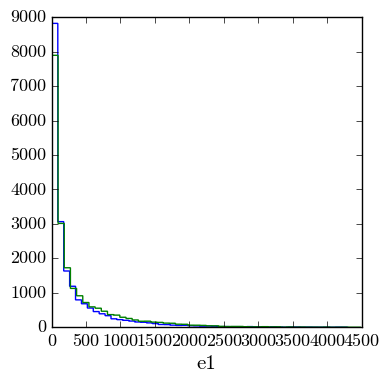

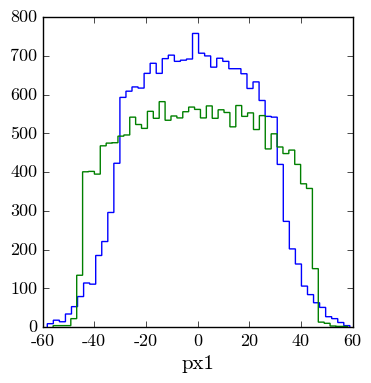

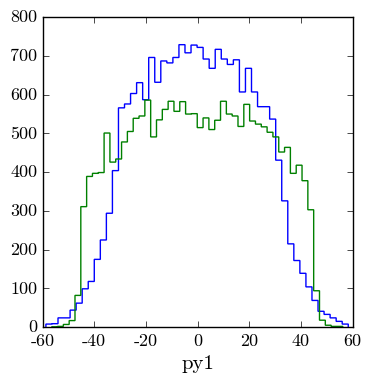

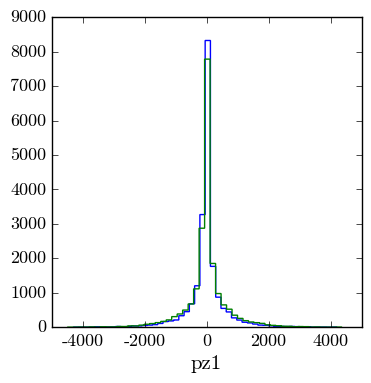

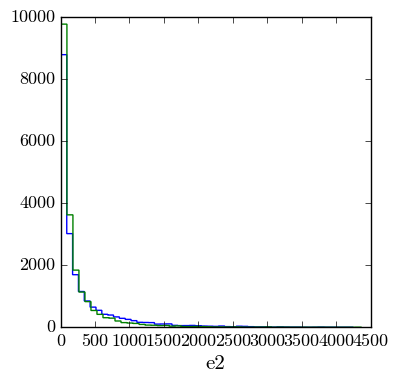

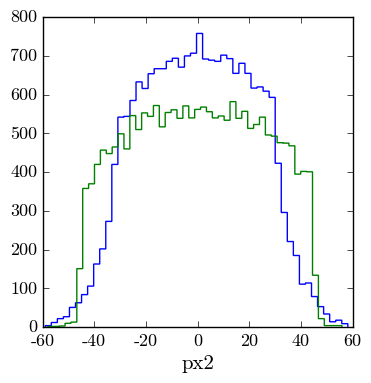

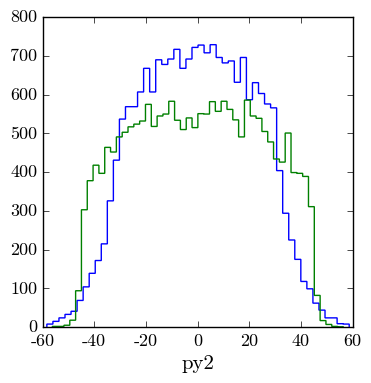

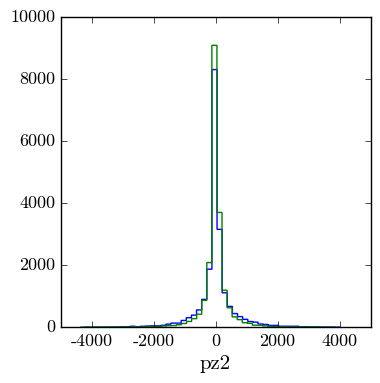

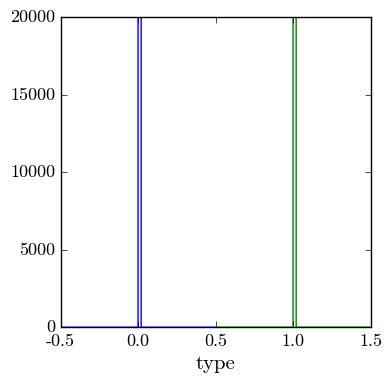

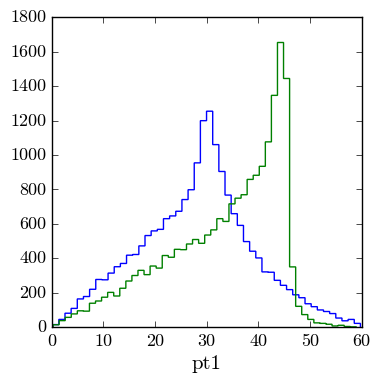

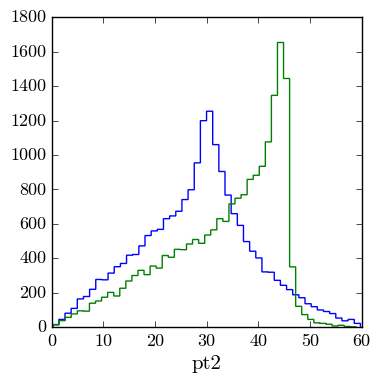

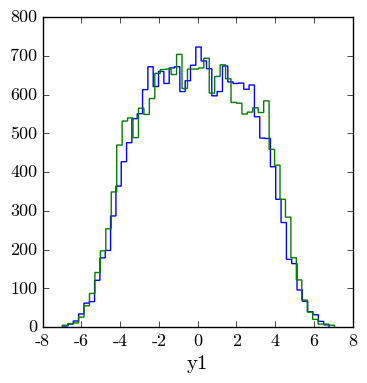

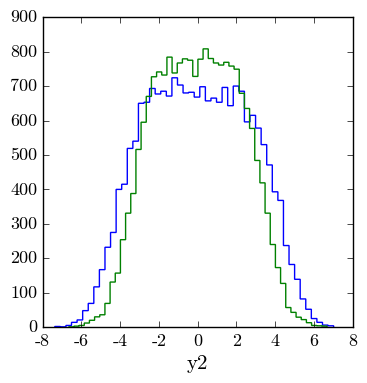

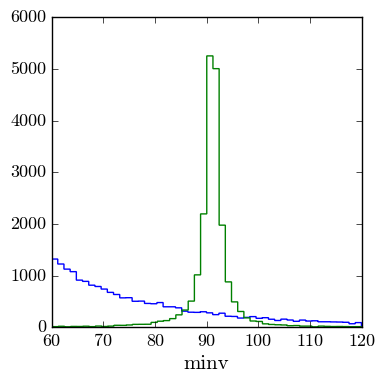

In [39]:
for column in cols:
    for df in DF1, DF2:
        plt.hist(df[column], histtype='step', bins=50)
    plt.xlabel(column)
    plt.show()   